# Mašinsko učenje - Linearna regresija

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Zadatak 1

Na osnovu zadatog skupa podataka odrediti vrednost funkcije za x = 0.64.

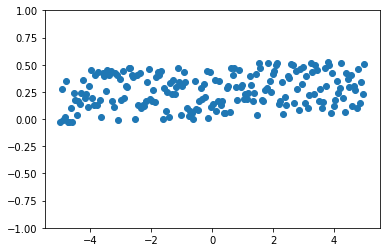

In [2]:
def f(x):
    return 0.01*x+np.random.random(len(x))*0.5

x = np.linspace(-5, 5, 200)
y = f(x)
plt.ylim(-1, 1)
plt.scatter(x, y)

## Rešenje

Naći prosečnu vrednost i koristiti je kao procenu za bilo ulaz. U ovom slučaju ovako jednostavna procena može biti dovoljno dobra.

Funkcija procena_prosek prima skup podataka sačinjen od niza vektora osobina x i vektora očekivanih vrednosti y. Svaki element iz y predstavlja očekivanu vrednost za ulazni vektor x. Povratna vrednost funkcije procena_prosek je model, odnosno funkcija koja za dati vektor osobina vraća procenu. U ovom slučaju model se dobija računanjem prosečne vrednosti. Dobijeni model je funkcija koja za bilo koje x vraća prosečnu vrednost.

[0.26315518]


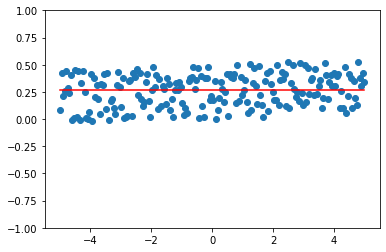

In [3]:
def procena_prosek(x, y):
    w = np.average(y)
    
    def model(x):
        return np.ones(len(x))*w
    return model

model = procena_prosek(x, y)

print(model(np.array([0.64])))

plt.ylim(-1, 1)
plt.scatter(x, f(x))
plt.plot(x, model(x), 'r')

## Zadatak 2

Na osnovu zadatog skupa podataka odrediti vrednost funkcije za x = 2.14.

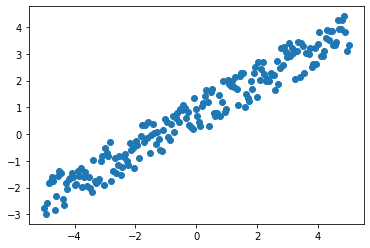

In [4]:
def f(x):
    return 0.63*x+np.random.random(len(x))*1.5

x = np.linspace(-5, 5, 200)
y = f(x)
plt.scatter(x, y)

## Rešenja

U ovom slučaju ulazni skup podataka ima linearan trend koji se može opisati funkcijom $f(x)=ax+b$. Prilikom određivanja modela biće neophodno odrediti keficijente $a$ i $b$. Jedan način da se koeficijenti odrede bio bi da se odabere par karakterističnih tačaka iz skupa podataka i da se za njih izračuna prava koja prolazi kroz njih. U ovom slučaju izbor tačaka može drastično uticati na rešenje. Drugi način bi bio da se pronađu koeficijenti koji zadovoljavaju uslov da je odstupanje predviđenih vrednosti i stvarnih vrednosti minimalno. Za ovo je potrebno uvesti pojam funkcije greške.

### Rešenje 1 - linearna interpolacija

Prvo je potrebno odabrati dve karakteristične tačke, npr. tačku sa najmanjom $(x, y)$ koordinatom i tačku sa najvećom $(x, y)$ koordinatom. Zatim za ove tačke treba rešiti sistem jednačina kako bi se dobili koeficijenti koji opisuju pravu koja prolazi kroz odabrane tačke.

[2.29235008]


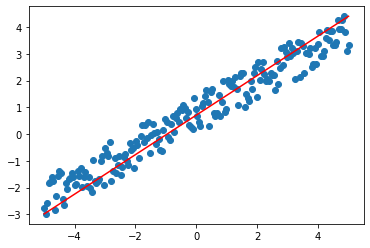

In [5]:
def procena_interpolacija(x, y):
    xy = np.column_stack([x, y])
    min_p = np.min(xy, axis=0)
    max_p = np.max(xy, axis=0)
    
    w1 = (max_p[1] - min_p[1])/(max_p[0] - min_p[0])
    w0 = max_p[1] - max_p[0]*w1
    
    def model(x):
        return w1*x + w0
    
    return model

model = procena_interpolacija(x, y)
print(model(np.array([2.14])))
plt.scatter(x, y)
plt.plot(x, model(x), 'r')

### Rešenje 2 - prosta linearna regresija

Pretopostavimo da je potrebno odrediti koeficijente $a$ i $b$ jednačine $f(x) = ax + b$ ali tako da je razlika između očekivanih vrednosti i vrednosti koje vraća funkcija $f$, tj. greška minimalna. Ukoliko grešku izrazimo kao $\sum(y_i - \hat{y_i})^2$, odnosno $\sum(y_i - ax_i + b)^2$, pri čemu je $y_i$ očekivana vrednost za ulaz $x_i$ a $\hat{y_i}$ vrednost koju je funkcija $f$ vratila za ulaz $x_i$ onda koeficijente možemo direktno izraziti kao:

\begin{align}
a & = \frac{ns_{xy}-s_xs_y}{n(s_{x^2}-s_x^2)} \\
b & = \frac{s_y-as_x}{n} \\
\end{align}

[2.13414298]


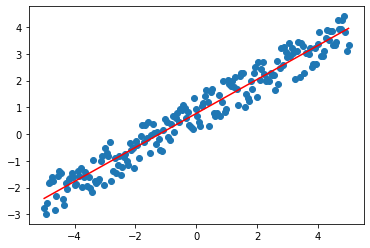

In [6]:
def prosta_lin_reg(x, y):
    sx = np.sum(x)
    sy = np.sum(y)
    sx2 = np.sum(x*x)
    sxy = np.sum(x*y)
    n = len(x)
    
    w1 = (n*sxy - sx*sy)/(n*(sx2-sx*sx))
    w0 = (sy - w1*sx)/n
    
    def model(x):
        return w1*x+w0
    return model

model = prosta_lin_reg(x, y)
print(model(np.array([2.14])))
plt.scatter(x, y)
plt.plot(x, model(x), 'r')

## Zadatak 3

Na osnovu zadatog skupa podataka odrediti vrednost funkcije za x = 2.52.

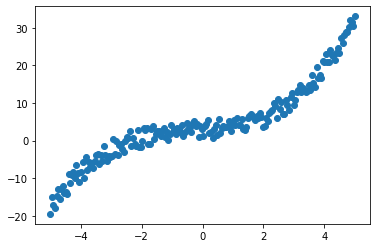

In [7]:
def f(x):
    return 0.18*x**3+0.2*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)
plt.scatter(x, f(x))

## Rešenje

Podaci su raspoređeni tako da prate neku zamišljenu pravu, pa upotreba proste linearne regresije u ovom slučaju ne bi dala dovoljno dobro rešenje. Iz grafika se vidi da bi se podaci najbolje mogli opisati polinomom trećeg stepena. To znači da bi model trebao da bude funkcija oblika $f(x)=ax^3 + bx^2 + cx + d$. Kako su parametri $a$, $b$, $c$ i $d$ linearni moguće je upotrebiti linearnu regresiju za rešavanje ovog problema, međutim prvo je potrebno drugačije predstaviti funkciju koja predstavlja model. Do sada su parametri modela posmatrani odvojeno ali ako model predstavimo kao $f(x) = w_3x_3 + w_2x_2 + w_1x_1 + w_0x_0$ pri čemu su promenljive $x_i$ elementi vektora $\vec{x}$ a $w_i$ elementi vektora $\vec{w}$ onda ovu funkciju možemo jednostavnije zapisati kao $f(\vec{x})=\vec{x}\vec{w}$. Nakon ovoga sve podatke iz skupa podataka možemo predstaviti preko matrice $X$ čiji redovi predstavljaju vektore $\vec{x}$ i vektora $\vec{y}$ čiji elementi su očekivane vrednosti za vektore iz $X$. Nakon toga evaluaciju modela možemo predstaviti kao množenje neke matirce $X$ vektorom $\vec{w}$ čiji rezultat je vektor predikcija $\vec{\hat{y}}$, odnosno $\vec{\hat{y}}=X\vec{w}$. Na osnovu ovakve postavke problema možemo izvesti jednačinu za direktno računanje vektora $\vec{w}$ koji zadovoljava uslov da je kvadrat greške minimalni. Jednačina za dobijanje vektora $\vec{w}$ je $\vec{w} = (X^TX)^{-1}X^T\vec{y}$, gde je $(X^TX)^{-1}$ inverzna matrica matrice dobijene proizvodom transponovane matrice $X$ sa matricom $X$.

[8.12464795]


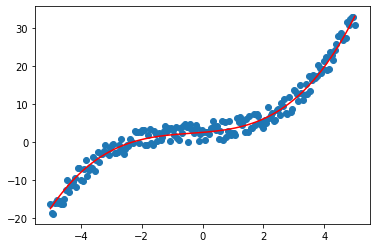

In [8]:
def lin_reg(x, y):
    w = np.linalg.inv(x.T@x)@x.T@y
    
    def model(x):
        return x@w
    
    return model

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))
model = lin_reg(xx, y)
print(model(np.array([[2.52**3, 2.25**2, 2.52, 1]])))
plt.scatter(x, f(x))
plt.plot(x, model(xx), 'r')

## Poređenje rezultata sve tri metode

In [9]:
model_prosek = procena_prosek(x, y)
model_interpolacija = procena_interpolacija(x, y)
model_prosta_lin_reg = prosta_lin_reg(x, y)

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))
model_lin_reg = lin_reg(xx, y)

print("Prosek: ", model_prosek(np.array([2.52])))
print("Interpolacija: ", model_interpolacija(np.array([2.52])))
print("Prosta linearna regresija: ", model_prosta_lin_reg(np.array([2.52])))
print("Linearna regresija: ", model_lin_reg(np.array([[2.52**3, 2.25**2, 2.52, 1]])))

Prosek:  [4.36172658]
Interpolacija:  [19.9114299]
Prosta linearna regresija:  [12.73695174]
Linearna regresija:  [8.12464795]


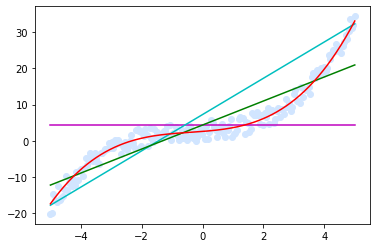

In [10]:
plt.scatter(x, f(x), color="#d1e5ff")
plt.plot(x, model_prosek(x), "m")
plt.plot(x, model_interpolacija(x), "c")
plt.plot(x, model_prosta_lin_reg(x), "g")
plt.plot(x, model_lin_reg(xx), "r")